#HW3 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd
import random
from matplotlib.table import Table
import copy

In [10]:
GAMMA = 1.0
ALPHA = 0.1
EPSILON = 0.3

S0 = np.array([1, 0]) # row 1, col 0
ST = np.array([1, 3]) # row 1, col 3
# ACTIONS = [np.array([-1, 0]),
#            np.array([0, 1]),
#            np.array([1, 0]),
#            np.array([0, -1])]
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]

q_table = np.zeros((3, 4, len(ACTIONS)))



In [11]:
def choose_action(state, q_table, epsilon):
    # 0.7 choose the best, 0.3 random
    action = None
    action_idx = 0
    if rd.rand() < epsilon:
        action_idx = np.random.choice(range(4)) 
        action = ACTIONS[action_idx]
    else:
        action_idx = np.argmax(q_table[int(state[0]), int(state[1])])
        action = ACTIONS[action_idx]
    return action, action_idx


In [12]:
def step(state, action):
    state = np.array(state)
    next_state = (state + action).tolist()
    x, y = next_state
    reward = -1
    
    # x is from 0~2, y is from 0~3
    if x < 0 or x > 2 or y < 0 or y > 3:
        if state[0] == 0:  # if the agent at swamp originally, and it steps out of the bound, then the R = -100
            reward = -100
        else:
            reward = -1.0
        next_state = list(state)
    else:
        if x == 0: # if next state is in the first row, which means the agent is in swamp
            reward = -100
        else:
            reward = -1.0
    return next_state, reward

In [13]:
def episode(output):

  returns = 0
  visited_state = []
  global q_table
  # update 
  new_q_table = copy.deepcopy(q_table)
  for tmp in reversed(output):
    s, r, a = tmp[0], tmp[1], tmp[2]
    # print(f'r: {r}')
    # returns = (GAMMA * r + returns)
    if [s, a] not in visited_state:
      visited_state.append([s, a])
      returns = (GAMMA * r + returns)
      oldEstimate = q_table[s[0], s[1], a]
      new_q_table[s[0], s[1], a] = oldEstimate + ALPHA * (returns - oldEstimate)
  q_table = new_q_table # update my qtable
  return returns

In [14]:
def run():
    # 500 episode each run
    # 30 runs
    final_res = [] 
    avg_q_table = []
    for _ in range(30):
        output = []
        avg_returns = []
        global q_table
        q_table = np.zeros((3, 4, len(ACTIONS)))

        for eps in range(500):
            # same q table
            state = S0
            action, act_idx = choose_action(state, q_table, EPSILON)
            while True:
                next_state, reward = step(state, action)
                output.append([list(state), reward, act_idx])
                action, act_idx = choose_action(next_state, q_table, EPSILON)
                state = next_state
                # At terminal state, update the q_table and find the returns
                if state[0] == ST[0] and state[1] == ST[1]:
                    G = episode(output)
                    # print(G)
                    avg_returns.append(G)
                    output = [] # reset output
                    break
        avg_q_table.append(q_table)
        final_res.append(avg_returns)

    final_returns = np.average(final_res, axis=0)
    plt.style.use('bmh')
    # plt.figure(figsize=(10, 10), dpi=100)
    plt.xlabel('Total steps')
    plt.ylabel('Average rewards')
    # plt.xticks([x for x in range(0, 1001, 100)])
    # plt.yticks([i for i in range(-1000, 0, -100)])
    # plt.ylim(-200, 0)

    plt.title('Average Returns vs. Episodes')

    p1 = plt.plot(final_returns)

    plt.legend(loc='upper left')
    plt.show()

    return avg_q_table # return the q_table for plotting


In [15]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(4):
    for j in range(3):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[j][i])
      if data[j][i][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[j][i][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[j][i][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[j][i][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.2f' %data[j][i][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[j][i][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[j][i][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[j][i][3], verticalalignment='center', horizontalalignment='center')
  #from google.colab import files #google.colab only
  plt.savefig("3.png")
  #files.download("3.png") #google.colab only



No handles with labels found to put in legend.


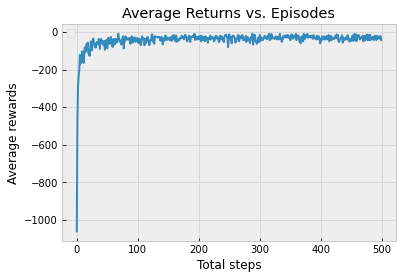

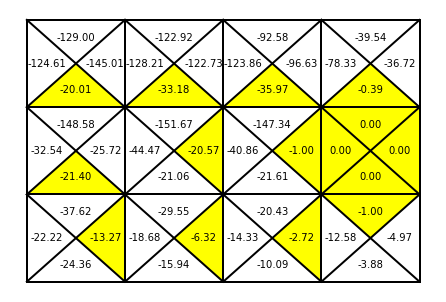

In [16]:
if __name__ == '__main__':
    # run()
    avg_q = run()
    avg_q = np.average(avg_q, axis=0)
    drawTable(avg_q)
